In [73]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib. pyplot as plt
import random
import warnings
warnings.filterwarnings("ignore")

In [74]:
df = pd.read_csv("innercity.csv")

In [75]:
df.shape

(21613, 23)

There are 21613 data points and 23 features in the dataset

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cid               21613 non-null  int64  
 1   dayhours          21613 non-null  object 
 2   price             21613 non-null  int64  
 3   room_bed          21613 non-null  int64  
 4   room_bath         21613 non-null  float64
 5   living_measure    21613 non-null  int64  
 6   lot_measure       21613 non-null  int64  
 7   ceil              21613 non-null  float64
 8   coast             21613 non-null  int64  
 9   sight             21613 non-null  int64  
 10  condition         21613 non-null  int64  
 11  quality           21613 non-null  int64  
 12  ceil_measure      21613 non-null  int64  
 13  basement          21613 non-null  int64  
 14  yr_built          21613 non-null  int64  
 15  yr_renovated      21613 non-null  int64  
 16  zipcode           21613 non-null  int64 

dayhours is of the type object all other fetaures are numeric (int or float)

In [77]:
df['dayhours'] = df['dayhours'].str.strip('T000000')

Stripping the suffix T000000 from all the values of the feature dayhours

In [78]:
#5 point summary of each feature
df.describe().T

count          mean           std           min  \
cid               21613.0  4.580302e+09  2.876566e+09  1.000102e+06   
price             21613.0  5.401822e+05  3.673622e+05  7.500000e+04   
room_bed          21613.0  3.370842e+00  9.300618e-01  0.000000e+00   
room_bath         21613.0  2.114757e+00  7.701632e-01  0.000000e+00   
living_measure    21613.0  2.079900e+03  9.184409e+02  2.900000e+02   
lot_measure       21613.0  1.510697e+04  4.142051e+04  5.200000e+02   
ceil              21613.0  1.494309e+00  5.399889e-01  1.000000e+00   
coast             21613.0  7.541757e-03  8.651720e-02  0.000000e+00   
sight             21613.0  2.343034e-01  7.663176e-01  0.000000e+00   
condition         21613.0  3.409430e+00  6.507430e-01  1.000000e+00   
quality           21613.0  7.656873e+00  1.175459e+00  1.000000e+00   
ceil_measure      21613.0  1.788391e+03  8.280910e+02  2.900000e+02   
basement          21613.0  2.915090e+02  4.425750e+02  0.000000e+00   
yr_built          21613.0  1.971005e+03  2.937341e+01  1.900000e+03   
yr_renovated      21613.0  8.440226e+01  4.016792e+02  0.000000e+00   
zipcode           21613.0  9.807794e+04  5.350503e+01  9.800100e+04   
lat               21613.0  4.756005e+01  1.385637e-01  4.715590e+01   
long              21613.0 -1.222139e+02  1.408283e-01 -1.225190e+02   
living_measure15  21613.0  1.986552e+03  6.853913e+02  3.990000e+02   
lot_measure15     21613.0  1.276846e+04  2.730418e+04  6.510000e+02   
furnished         21613.0  1.966872e-01  3.975030e-01  0.000000e+00   
total_area        21613.0  1.718687e+04  4.158908e+04  1.423000e+03   

                           25%           50%           75%           max  
cid               2.123049e+09  3.904930e+09  7.308900e+09  9.900000e+09  
price             3.219500e+05  4.500000e+05  6.450000e+05  7.700000e+06  
room_bed          3.000000e+00  3.000000e+00  4.000000e+00  3.300000e+01  
room_bath         1.750000e+00  2.250000e+00  2.500000e+00  8.000000e+00  
living_measure    1.427000e+03  1.910000e+03  2.550000e+03  1.354000e+04  
lot_measure       5.040000e+03  7.618000e+03  1.068800e+04  1.651359e+06  
ceil              1.000000e+00  1.500000e+00  2.000000e+00  3.500000e+00  
coast             0.000000e+00  0.000000e+00  0.000000e+00  1.000000e+00  
sight             0.000000e+00  0.000000e+00  0.000000e+00  4.000000e+00  
condition         3.000000e+00  3.000000e+00  4.000000e+00  5.000000e+00  
quality           7.000000e+00  7.000000e+00  8.000000e+00  1.300000e+01  
ceil_measure      1.190000e+03  1.560000e+03  2.210000e+03  9.410000e+03  
basement          0.000000e+00  0.000000e+00  5.600000e+02  4.820000e+03  
yr_built          1.951000e+03  1.975000e+03  1.997000e+03  2.015000e+03  
yr_renovated      0.000000e+00  0.000000e+00  0.000000e+00  2.015000e+03  
zipcode           9.803300e+04  9.806500e+04  9.811800e+04  9.819900e+04  
lat               4.747100e+01  4.757180e+01  4.767800e+01  4.777760e+01  
long             -1.223280e+02 -1.222300e+02 -1.221250e+02 -1.213150e+02  
living_measure15  1.490000e+03  1.840000e+03  2.360000e+03  6.210000e+03  
lot_measure15     5.100000e+03  7.620000e+03  1.008300e+04  8.712000e+05  
furnished         0.000000e+00  0.000000e+00  0.000000e+00  1.000000e+00  
total_area        7.035000e+03  9.575000e+03  1.300000e+04  1.652659e+06

In [79]:
#check the presence of missing values
df.isnull().sum()

cid                 0
dayhours            0
price               0
room_bed            0
room_bath           0
living_measure      0
lot_measure         0
ceil                0
coast               0
sight               0
condition           0
quality             0
ceil_measure        0
basement            0
yr_built            0
yr_renovated        0
zipcode             0
lat                 0
long                0
living_measure15    0
lot_measure15       0
furnished           0
total_area          0
dtype: int64

No missing value is present

In [80]:
#Convert dayhours to numeric
df['dayhours'] = pd.to_numeric(df['dayhours'],errors='coerce')

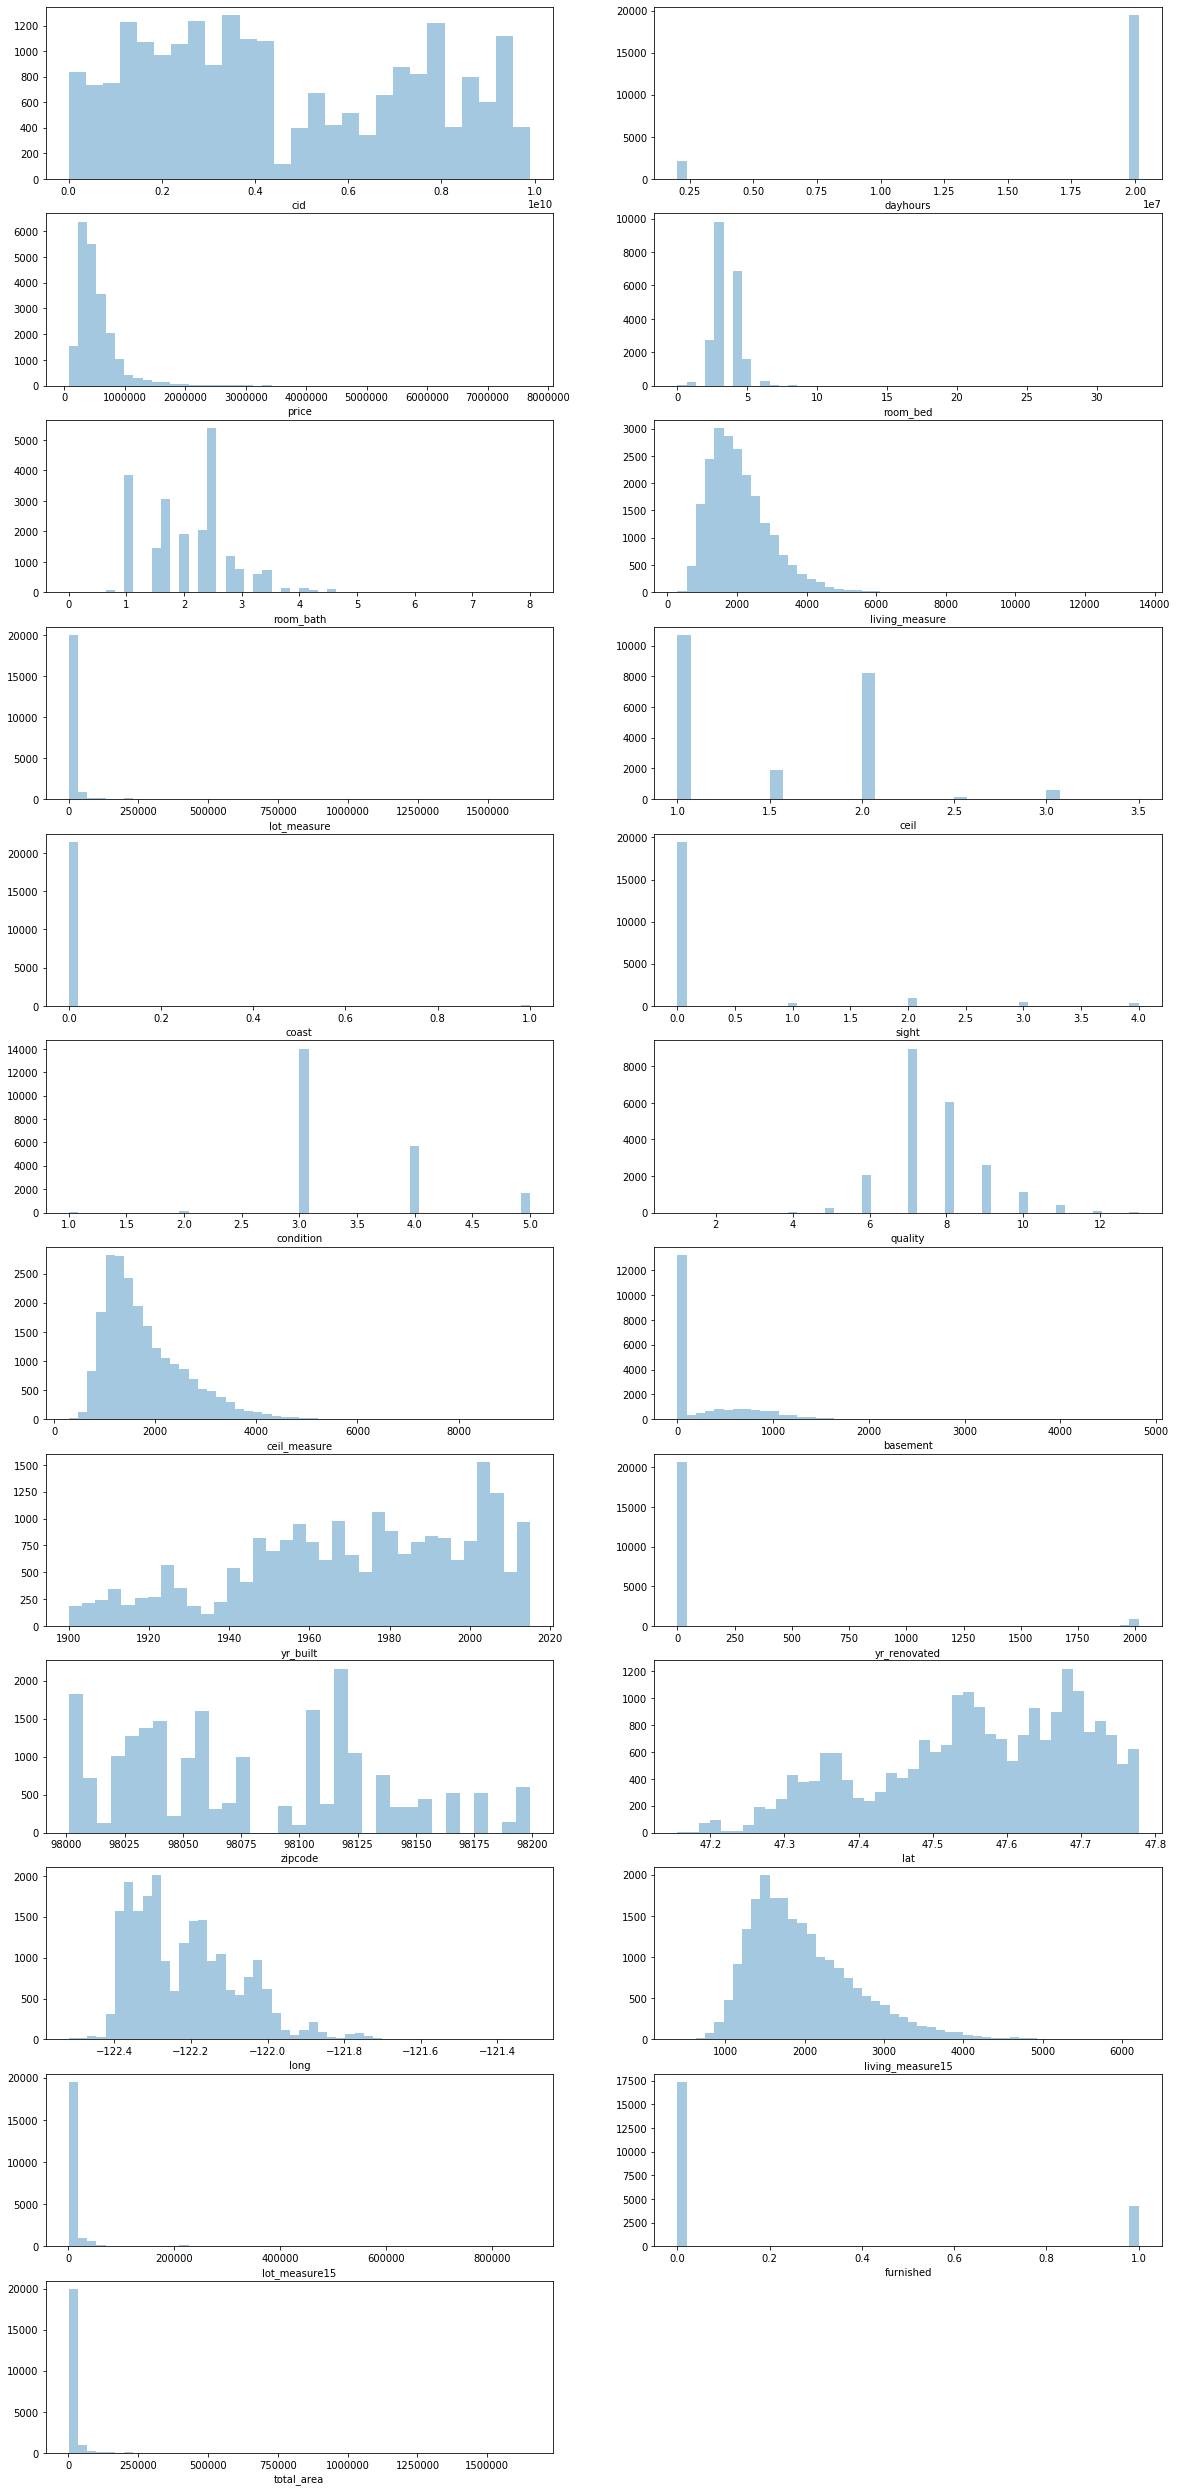

In [81]:
#Histograms of all the features
sns.distributions._has_statsmodels = False
plt.figure(figsize=(20,45))
pos = 1
for i in df.columns:
    plt.subplot(12,2,pos)
    sns.distplot(df[i],kde=False)
    pos = pos + 1

Mostly all the features are having skewed normal distribution which doesnt work well with regression models
Need to transform data points to reduce the influence of the variable with descrete values
like room_bed, room_bath, ceil,sight,condition, quality, furnished

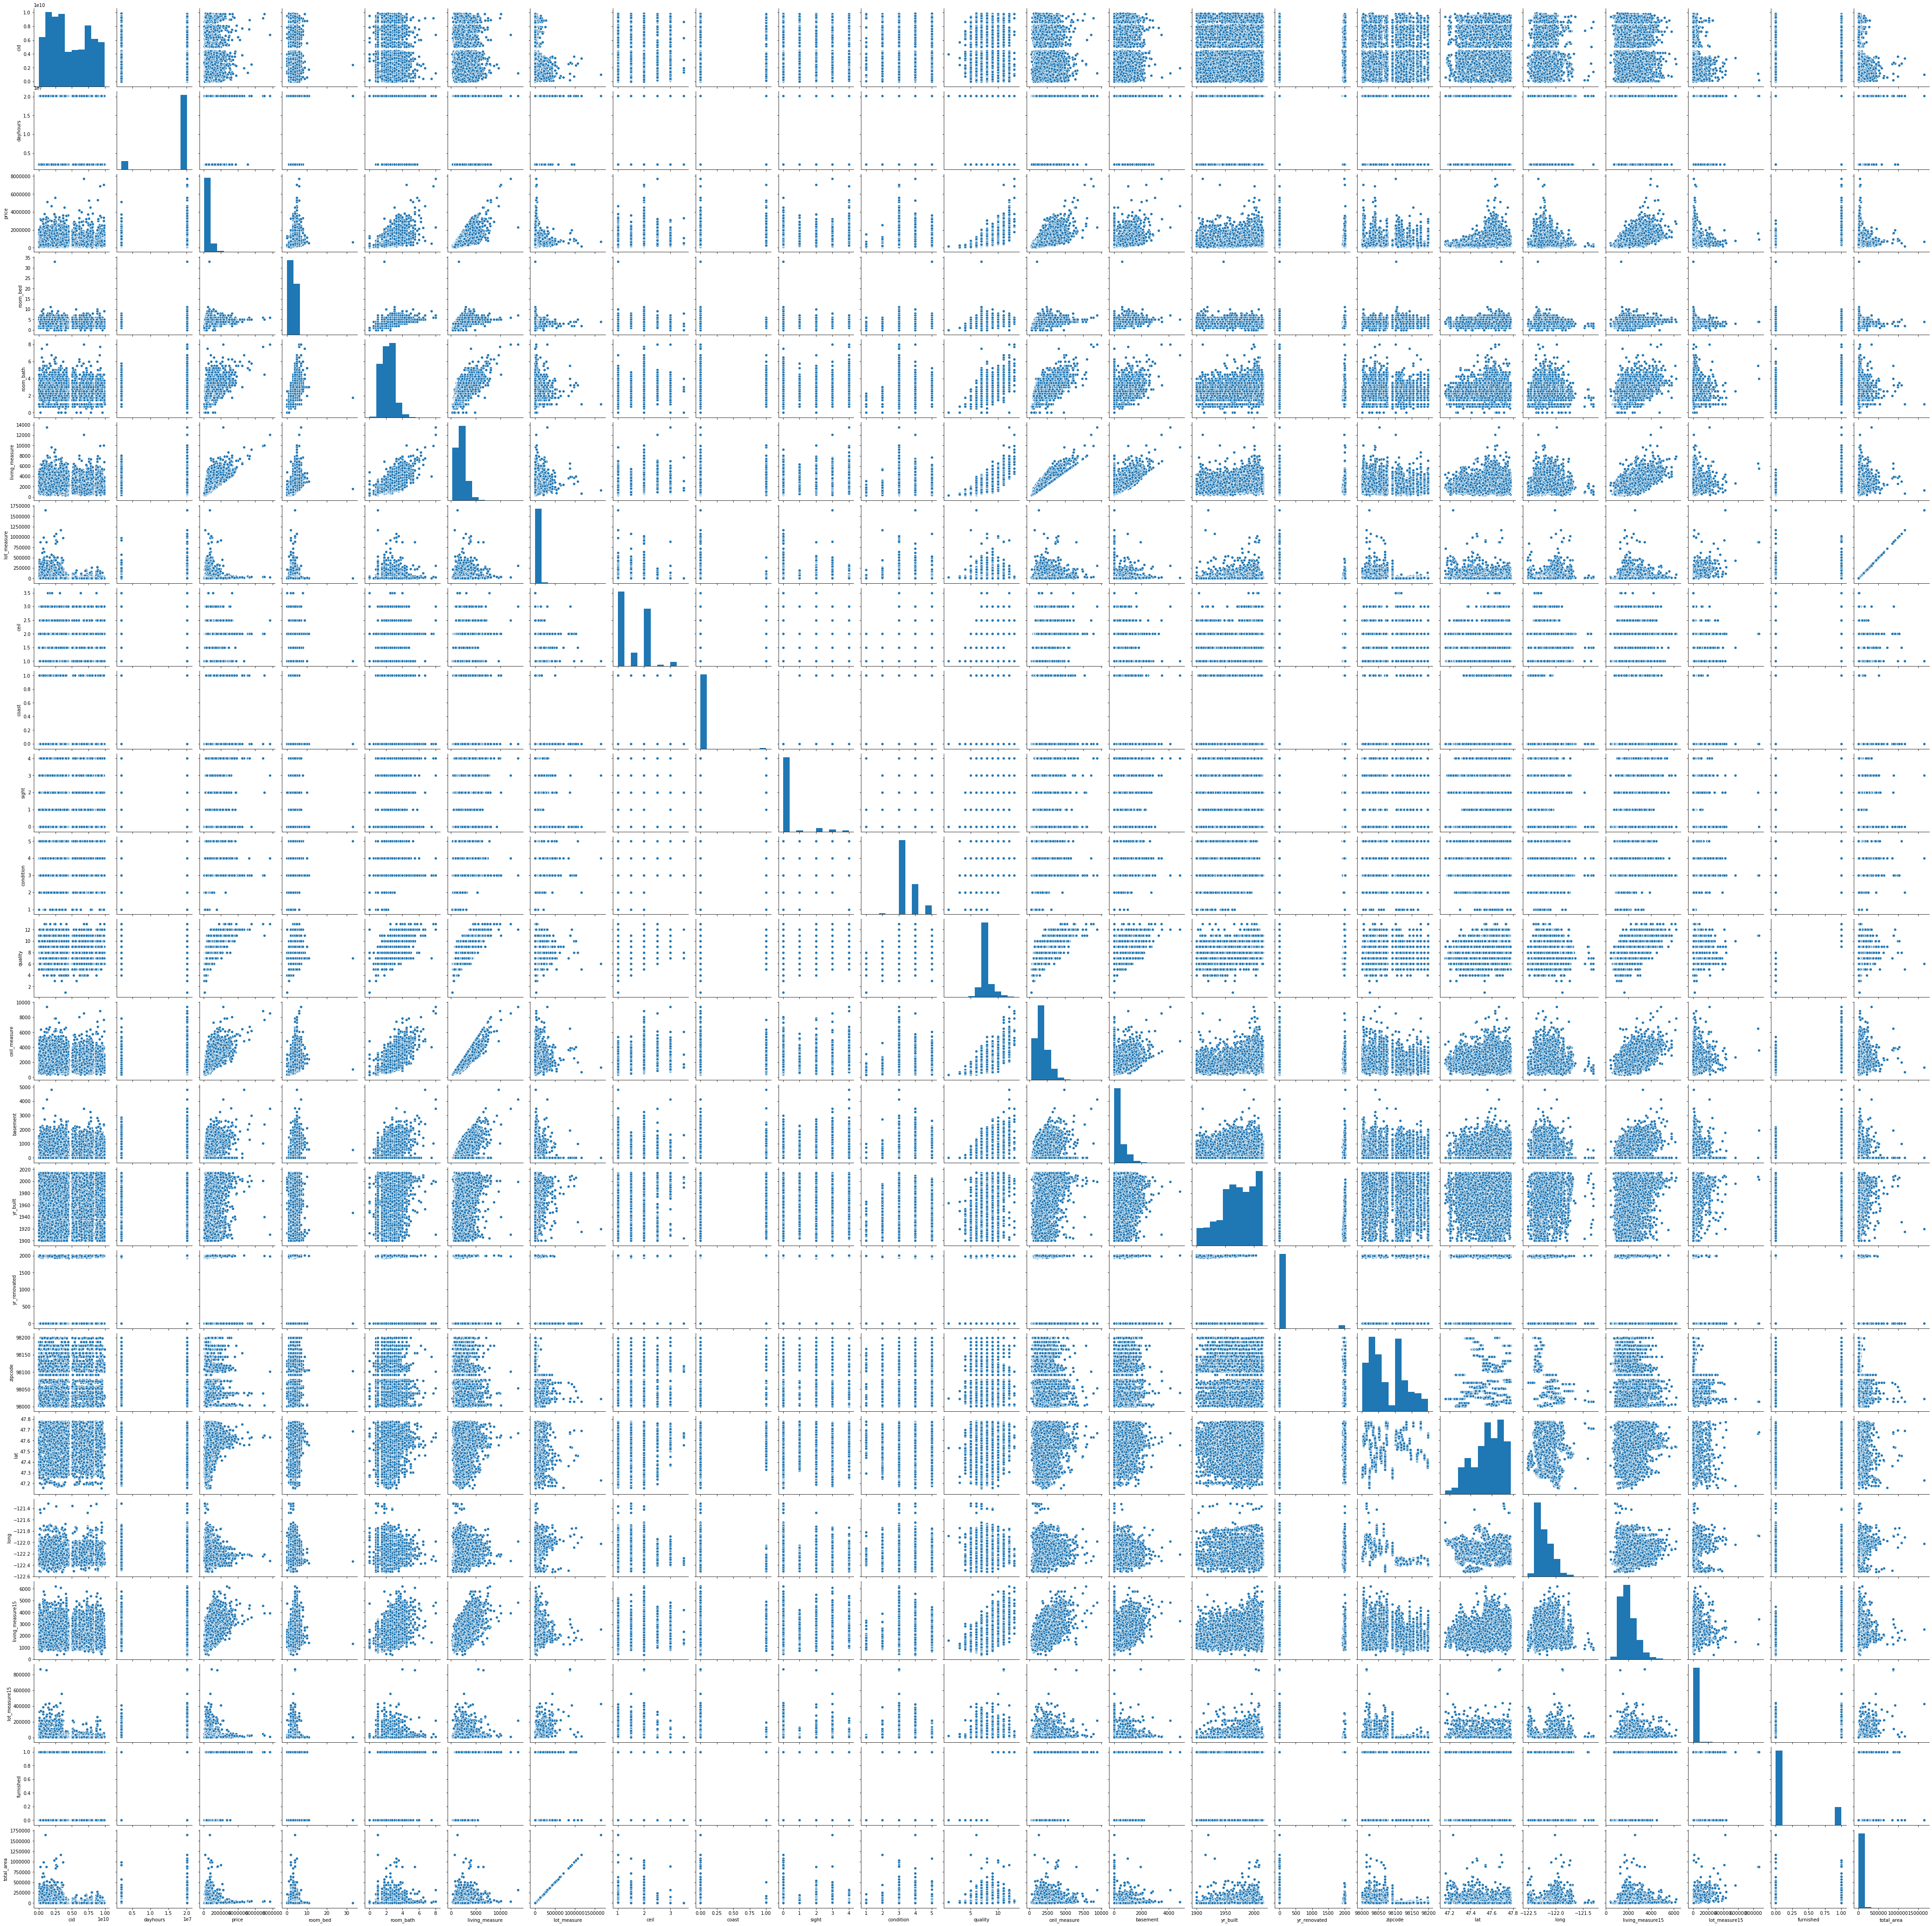

In [82]:
sns.pairplot(df)

From the pairplot it is observed that features like ceil_measure, living_measure, room_bath,lot_meausre, total_area are having some linear relationship with the price and among them. 

In [83]:
#Correlation matrix
df.corr()

cid  dayhours     price  room_bed  room_bath  \
cid               1.000000 -0.009815 -0.016797  0.001286   0.005160   
dayhours         -0.009815  1.000000 -0.008573 -0.007203  -0.005075   
price            -0.016797 -0.008573  1.000000  0.308338   0.525134   
room_bed          0.001286 -0.007203  0.308338  1.000000   0.515884   
room_bath         0.005160 -0.005075  0.525134  0.515884   1.000000   
living_measure   -0.012258 -0.009460  0.702044  0.576671   0.754665   
lot_measure      -0.132109 -0.005319  0.089655  0.031703   0.087740   
ceil              0.018525  0.000809  0.256786  0.175429   0.500653   
coast            -0.002721 -0.005270  0.266331 -0.006582   0.063744   
sight             0.011592 -0.009911  0.397346  0.079532   0.187737   
condition        -0.023783  0.011674  0.036392  0.028472  -0.124982   
quality           0.008130 -0.002120  0.667463  0.356967   0.664983   
ceil_measure     -0.010842 -0.002115  0.605566  0.477600   0.685342   
basement         -0.005151 -0.015673  0.323837  0.303093   0.283770   
yr_built          0.021380 -0.008383  0.053982  0.154178   0.506019   
yr_renovated     -0.016907 -0.011571  0.126442  0.018841   0.050739   
zipcode          -0.008224  0.008209 -0.053168 -0.152668  -0.203866   
lat              -0.001891  0.005661  0.306919 -0.008931   0.024573   
long              0.020799  0.002020  0.021571  0.129473   0.223042   
living_measure15 -0.002901 -0.000052  0.585374  0.391638   0.568634   
lot_measure15    -0.138798 -0.001982  0.082456  0.029244   0.087175   
furnished        -0.010009  0.001910  0.565991  0.259268   0.484923   
total_area       -0.131844 -0.005506  0.104796  0.044310   0.104050   

                  living_measure  lot_measure      ceil     coast     sight  \
cid                    -0.012258    -0.132109  0.018525 -0.002721  0.011592   
dayhours               -0.009460    -0.005319  0.000809 -0.005270 -0.009911   
price                   0.702044     0.089655  0.256786  0.266331  0.397346   
room_bed                0.576671     0.031703  0.175429 -0.006582  0.079532   
room_bath               0.754665     0.087740  0.500653  0.063744  0.187737   
living_measure          1.000000     0.172826  0.353949  0.103818  0.284611   
lot_measure             0.172826     1.000000 -0.005201  0.021604  0.074710   
ceil                    0.353949    -0.005201  1.000000  0.023698  0.029444   
coast                   0.103818     0.021604  0.023698  1.000000  0.401857   
sight                   0.284611     0.074710  0.029444  0.401857  1.000000   
condition              -0.058753    -0.008958 -0.263768  0.016653  0.045990   
quality                 0.762704     0.113621  0.458183  0.082775  0.251321   
ceil_measure            0.876597     0.183512  0.523885  0.072075  0.167649   
basement                0.435043     0.015286 -0.245705  0.080588  0.276947   
yr_built                0.318049     0.053080  0.489319 -0.026161 -0.053440   
yr_renovated            0.055363     0.007644  0.006338  0.092885  0.103917   
zipcode                -0.199430    -0.129574 -0.059121  0.030285  0.084827   
lat                     0.052529    -0.085683  0.049614 -0.014274  0.006157   
long                    0.240223     0.229521  0.125419 -0.041910 -0.078400   
living_measure15        0.756420     0.144608  0.279885  0.086463  0.280439   
lot_measure15           0.183286     0.718557 -0.011269  0.030703  0.072575   
furnished               0.632947     0.118883  0.347749  0.069882  0.220250   
total_area              0.194209     0.999763  0.002637  0.023809  0.080693   

                  ...  basement  yr_built  yr_renovated   zipcode       lat  \
cid               ... -0.005151  0.021380     -0.016907 -0.008224 -0.001891   
dayhours          ... -0.015673 -0.008383     -0.011571  0.008209  0.005661   
price             ...  0.323837  0.053982      0.126442 -0.053168  0.306919   
room_bed          ...  0.303093  0.154178      0.018841 -0.152668 -0.008931   
room_bath         ...  0.2

Based on correlation matrix living_measure and ceil_measure highly correlated (.87)
Correlation between lot_measure and total_area is (.99)


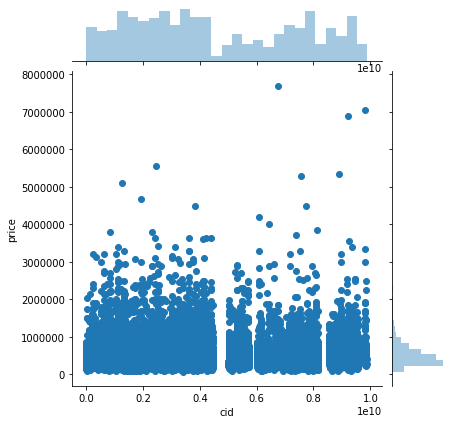

In [84]:
#cid is uniformaly distrubured
#Checking relation between cid and price
sns.jointplot(df['cid'],df['price'])

From above plot it is seen that there is no specific relation between cid and price, so cid doesnt help much on prediction
of the price.

In [85]:
#dropping cid,ceil_measure and lot_measure from the data frame
df.drop(['cid','ceil_measure','lot_measure'],axis=1,inplace=True)

In [86]:
#doing one hot encoding for zipcode
df_zip = pd.get_dummies(df['zipcode'])
#Dropping the zip code and appending corresponding one hot data
df.drop('zipcode',axis=1,inplace=True)

In [87]:
df_log = np.log(df.drop(['price','lat','long'],axis=1)+1)
features = pd.concat([df_log,df[['lat','long']]],axis=1)

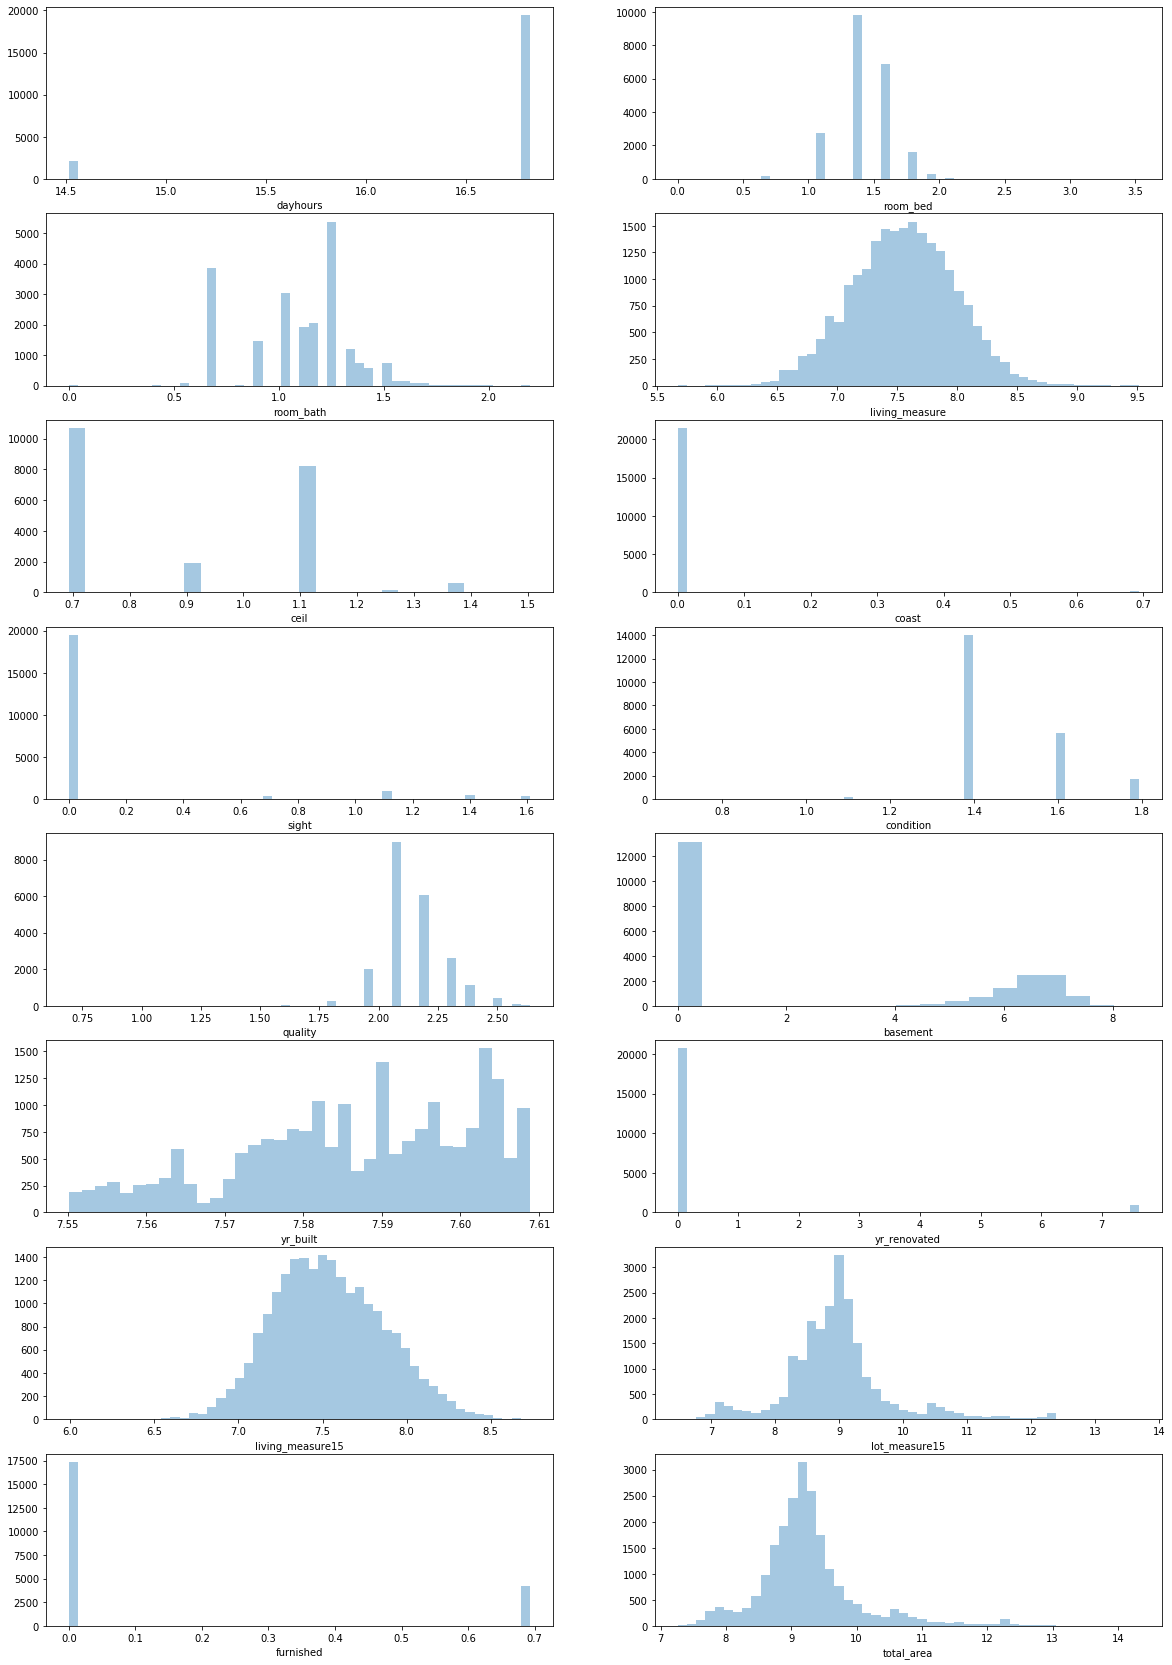

In [88]:
#Histograms of all the features after log transformation
sns.distributions._has_statsmodels = False
plt.figure(figsize=(20,45))
pos = 1
for i in df_log.columns:
    plt.subplot(12,2,pos)
    sns.distplot(df_log[i],kde=False)
    pos = pos + 1

In [89]:
#Adding polynomial features with degree 3 
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(3)
features_t = poly.fit_transform(features)

In [90]:
#Applying tranformation to the features, to make the distribution Gaussian like
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer()
df_t = pt.fit_transform(features_t)

In [91]:
df_m = pd.concat([pd.DataFrame(df_t),df_zip],axis=1)
#Using Min Max scaler to standardize the data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_m = scaler.fit_transform(df_m)
df_m.shape

(21613, 1400)

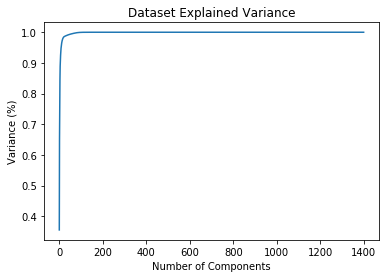

In [97]:
from sklearn.decomposition import PCA

#scale the data and perform pca
pca = PCA().fit(df_m)

#Plotting the Cumulative Summation of the Explained Variance
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)')
plt.title('Dataset Explained Variance')
plt.show()

In [128]:
print(np.sum(pca.explained_variance_ratio_[0:300]))

0.9999999820403399


In [1]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(PCA(300).fit_transform(df_m),df['price'], random_state = 1,test_size= 0.3)

NameError: name 'PCA' is not defined

In [111]:
lasso_params = {'alpha':list(np.logspace(-10,0,11))}
ridge_params = {'alpha':list(np.logspace(-10,0,11))}

from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

In [126]:
from sklearn.model_selection import GridSearchCV

gs_lasso = GridSearchCV(Lasso(),param_grid=lasso_params)

gs_lasso.fit(X_train,y_train)
gs_lasso.score(X_test,y_test)

0.8657814445247067

In [127]:
from sklearn.model_selection import GridSearchCV

gs_ridge = GridSearchCV(Ridge(),param_grid=ridge_params)

gs_ridge.fit(X_train,y_train)
gs_ridge.score(X_test,y_test)

0.8672161974720665

In [131]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_m,df['price'], random_state = 1,test_size= 0.2)

In [132]:
lasso = Lasso()
lasso.fit(X_train,y_train)
lasso.score(X_test,y_test)

0.8394495994801674